In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import re

In [40]:
def get_dataframe(n_job, n_iters):
    """n_job: número del job
    n_iters: número de iteraciones
    """
    df_total = pd.DataFrame()
    for n in range(n_iters):
        file = f"logs/rnn_rnn_joblib_{n_job}_{n}.out"
        df = pd.read_csv(file, sep="\t").iloc[[-3],:]
        header = df.columns[0]
        njobs = int(re.search(r"N_JOBS=(\d+)", header).group(1))
        n_samples = int(re.search(r"N_SAMPLES=(\d+)", header).group(1))
        row = df.iloc[0]
        run_time = float(re.search(r"TIEMPO TOTAL ENTRENAMIENTO \(pared\): ([0-9.]+) s", row.iloc[0]).group(1))
        print(f"N_JOBS: {njobs}, N_SAMPLES: {n_samples}, RUN TIME: {run_time} s")
        df_total = pd.concat([df_total, pd.DataFrame({
            "N_JOBS": [njobs],
            "N_SAMPLES": [n_samples],
            "RUN_TIME": [run_time]
        })], ignore_index=True)
    return df_total

In [41]:
df_part1 = get_dataframe(n_job=14794, n_iters=18)
df_part1

N_JOBS: 1, N_SAMPLES: 5000, RUN TIME: 53.157 s
N_JOBS: 2, N_SAMPLES: 5000, RUN TIME: 28.888 s
N_JOBS: 4, N_SAMPLES: 5000, RUN TIME: 15.523 s
N_JOBS: 8, N_SAMPLES: 5000, RUN TIME: 9.721 s
N_JOBS: 16, N_SAMPLES: 5000, RUN TIME: 6.393 s
N_JOBS: 32, N_SAMPLES: 5000, RUN TIME: 6.391 s
N_JOBS: 1, N_SAMPLES: 10000, RUN TIME: 99.213 s
N_JOBS: 2, N_SAMPLES: 10000, RUN TIME: 52.374 s
N_JOBS: 4, N_SAMPLES: 10000, RUN TIME: 28.335 s
N_JOBS: 8, N_SAMPLES: 10000, RUN TIME: 17.013 s
N_JOBS: 16, N_SAMPLES: 10000, RUN TIME: 10.855 s
N_JOBS: 32, N_SAMPLES: 10000, RUN TIME: 10.831 s
N_JOBS: 1, N_SAMPLES: 20000, RUN TIME: 193.788 s
N_JOBS: 2, N_SAMPLES: 20000, RUN TIME: 101.551 s
N_JOBS: 4, N_SAMPLES: 20000, RUN TIME: 55.102 s
N_JOBS: 8, N_SAMPLES: 20000, RUN TIME: 32.712 s
N_JOBS: 16, N_SAMPLES: 20000, RUN TIME: 20.122 s
N_JOBS: 32, N_SAMPLES: 20000, RUN TIME: 20.231 s


,N_JOBS,N_SAMPLES,RUN_TIME
0,1,5000,53.157
1,2,5000,28.888
2,4,5000,15.523
3,8,5000,9.721
4,16,5000,6.393
5,32,5000,6.391
6,1,10000,99.213
7,2,10000,52.374
8,4,10000,28.335
9,8,10000,17.013


In [42]:
df_part2 = get_dataframe(n_job=14799, n_iters=6)
df_part2

N_JOBS: 1, N_SAMPLES: 40000, RUN TIME: 380.896 s
N_JOBS: 2, N_SAMPLES: 40000, RUN TIME: 194.007 s
N_JOBS: 4, N_SAMPLES: 40000, RUN TIME: 104.195 s
N_JOBS: 8, N_SAMPLES: 40000, RUN TIME: 61.765 s
N_JOBS: 16, N_SAMPLES: 40000, RUN TIME: 38.454 s
N_JOBS: 32, N_SAMPLES: 40000, RUN TIME: 38.004 s


,N_JOBS,N_SAMPLES,RUN_TIME
0,1,40000,380.896
1,2,40000,194.007
2,4,40000,104.195
3,8,40000,61.765
4,16,40000,38.454
5,32,40000,38.004


In [43]:
df_info = pd.concat([df_part1, df_part2], ignore_index=True)
df_info

,N_JOBS,N_SAMPLES,RUN_TIME
0,1,5000,53.157
1,2,5000,28.888
2,4,5000,15.523
3,8,5000,9.721
4,16,5000,6.393
5,32,5000,6.391
6,1,10000,99.213
7,2,10000,52.374
8,4,10000,28.335
9,8,10000,17.013


In [44]:
"""
N_JOBS  N_SAMPLES  RUN_TIME
0        1       5000    53.157
1        2       5000    28.888
2        4       5000    15.523
3        8       5000     9.721
4       16       5000     6.393
5       32       5000     6.391
6        1      10000    99.213
7        2      10000    52.374
8        4      10000    28.335
9        8      10000    17.013
10      16      10000    10.855
11      32      10000    10.831
12       1      20000   193.788
13       2      20000   101.551
14       4      20000    55.102
15       8      20000    32.712
16      16      20000    20.122
17      32      20000    20.231
18       1      40000   380.896
19       2      40000   194.007
20       4      40000   104.195
21       8      40000    61.765
22      16      40000    38.454
23      32      40000    38.004
"""

'\nN_JOBS  N_SAMPLES  RUN_TIME\n0        1       5000    53.157\n1        2       5000    28.888\n2        4       5000    15.523\n3        8       5000     9.721\n4       16       5000     6.393\n5       32       5000     6.391\n6        1      10000    99.213\n7        2      10000    52.374\n8        4      10000    28.335\n9        8      10000    17.013\n10      16      10000    10.855\n11      32      10000    10.831\n12       1      20000   193.788\n13       2      20000   101.551\n14       4      20000    55.102\n15       8      20000    32.712\n16      16      20000    20.122\n17      32      20000    20.231\n18       1      40000   380.896\n19       2      40000   194.007\n20       4      40000   104.195\n21       8      40000    61.765\n22      16      40000    38.454\n23      32      40000    38.004\n'

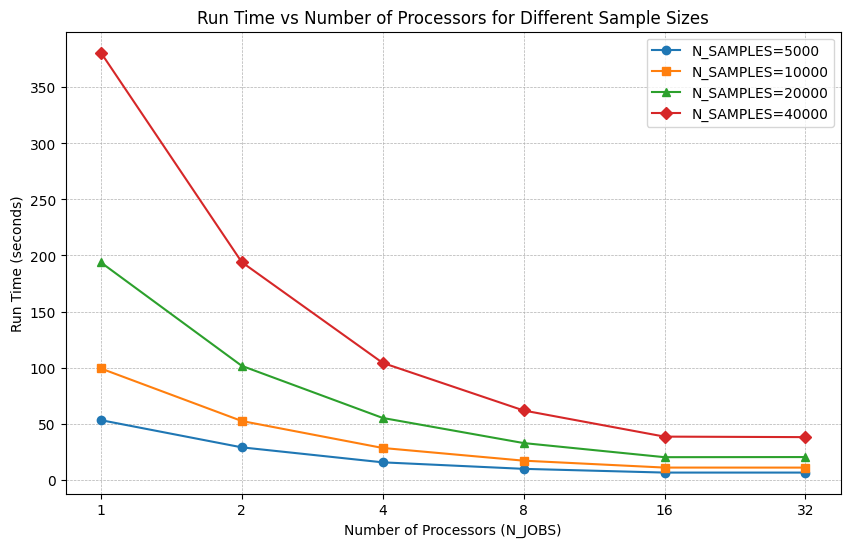

In [46]:
# plot time vs processors for different sample sizes
plt.figure(figsize=(10, 6))
markers = ['o', 's', '^', 'D']
for i, n_samples in enumerate(sorted(df_info["N_SAMPLES"].unique())):
    df_subset = df_info[df_info["N_SAMPLES"] == n_samples]
    plt.plot(df_subset["N_JOBS"], df_subset["RUN_TIME"], marker=markers[i % len(markers)], label=f"N_SAMPLES={n_samples}")
plt.xscale("log", base=2)
plt.xticks(df_info["N_JOBS"].unique(), df_info["N_JOBS"].unique())
plt.xlabel("Number of Processors (N_JOBS)")
plt.ylabel("Run Time (seconds)")
plt.title("Run Time vs Number of Processors for Different Sample Sizes")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
# plt.savefig("run_time_vs_processors.png")
plt.show()

In [50]:
a0_5k = 2.5
a1_5k = 98.26
a2_5k = 0.889

n_jobs_unique = sorted(df_info["N_JOBS"].unique())

y_hat_5k = a0_5k + a1_5k / pd.Series(n_jobs_unique) + a2_5k * pd.Series(n_jobs_unique).apply(lambda x: math.log2(x))
y_hat_5k

0    100.760000
1     52.519000
2     28.843000
3     17.449500
4     12.197250
5     10.015625
dtype: float64

In [134]:
a_0 = [1.25, 2.5, 4.8, 3.0]
a_1 = [52 ,98.26, 190, 378.0]
a_2 = [0.889, 0.889, 0.889,4]

df_y_hat = pd.DataFrame()

for i, n_samples in enumerate([5000, 10000, 20000, 40000]):
    y_hat = a_0[i] + a_1[i] / pd.Series(n_jobs_unique) + a_2[i] * pd.Series(n_jobs_unique).apply(lambda x: math.log2(x))
    df_temp = pd.DataFrame({
        "N_JOBS": n_jobs_unique,
        "N_SAMPLES": [ [5000, 10000, 20000, 40000][i] ] * len(n_jobs_unique),
        "PREDICTED_RUN_TIME": y_hat
    })
    df_y_hat = pd.concat([df_y_hat, df_temp], ignore_index=True)
df_y_hat

,N_JOBS,N_SAMPLES,PREDICTED_RUN_TIME
0,1,5000,53.250000
1,2,5000,28.139000
2,4,5000,16.028000
3,8,5000,10.417000
4,16,5000,8.056000
5,32,5000,7.320000
6,1,10000,100.760000
7,2,10000,52.519000
8,4,10000,28.843000
9,8,10000,17.449500


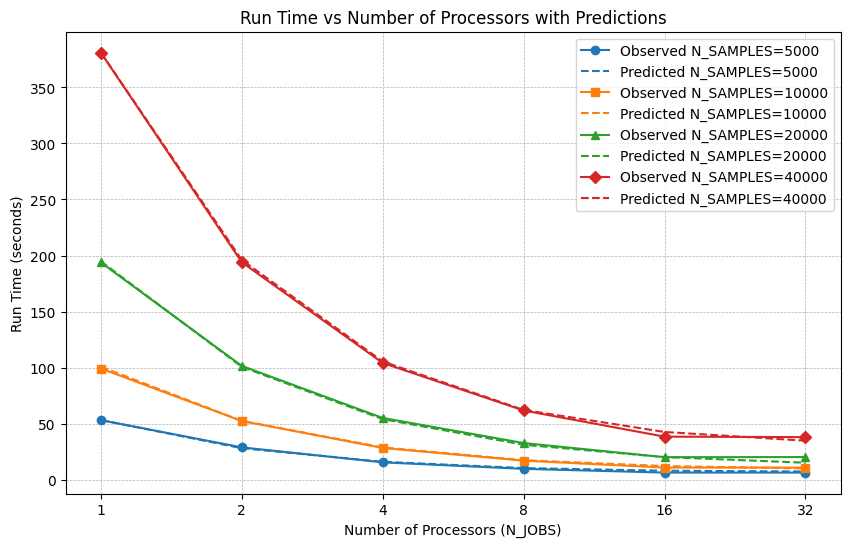

In [135]:
# plot time vs processors for different sample sizes with predicted lines (matching colors)
plt.figure(figsize=(10, 6))
markers = ['o', 's', '^', 'D']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for i, n_samples in enumerate(sorted(df_info["N_SAMPLES"].unique())):
    df_subset = df_info[df_info["N_SAMPLES"] == n_samples]
    color = colors[i % len(colors)]
    plt.plot(df_subset["N_JOBS"], df_subset["RUN_TIME"], marker=markers[i % len(markers)],
             label=f"Observed N_SAMPLES={n_samples}", color=color)
    
    df_yhat_subset = df_y_hat[df_y_hat["N_SAMPLES"] == n_samples]
    plt.plot(df_yhat_subset["N_JOBS"], df_yhat_subset["PREDICTED_RUN_TIME"], linestyle="--",
             label=f"Predicted N_SAMPLES={n_samples}", color=color)
plt.xscale("log", base=2)
plt.xticks(df_info["N_JOBS"].unique(), df_info["N_JOBS"].unique())
plt.xlabel("Number of Processors (N_JOBS)")
plt.ylabel("Run Time (seconds)")
plt.title("Run Time vs Number of Processors with Predictions")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
# plt.savefig("run_time_vs_processors_with_predictions.png")
plt.show()

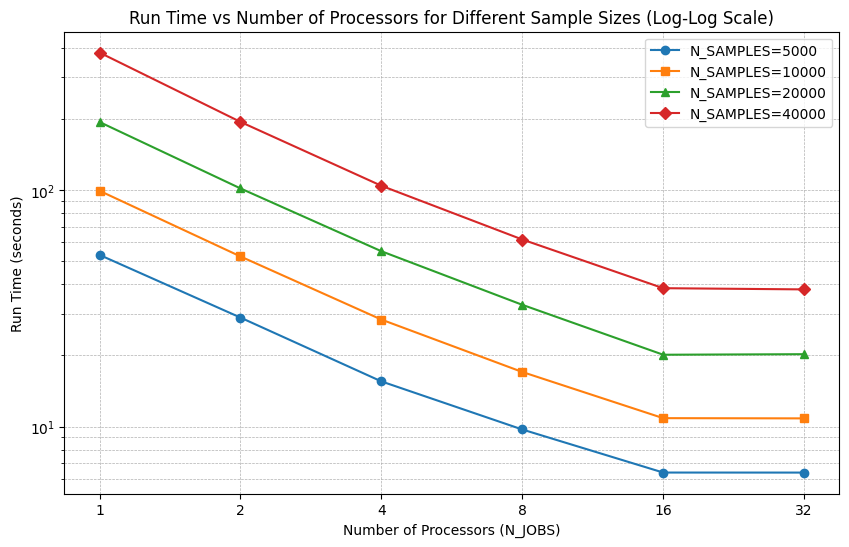

In [47]:
# plot time vs processors for different sample sizes (log-log)
plt.figure(figsize=(10, 6))
markers = ['o', 's', '^', 'D']
for i, n_samples in enumerate(sorted(df_info["N_SAMPLES"].unique())):
    df_subset = df_info[df_info["N_SAMPLES"] == n_samples]
    plt.plot(df_subset["N_JOBS"], df_subset["RUN_TIME"], marker=markers[i % len(markers)], label=f"N_SAMPLES={n_samples}")
plt.xscale("log", base=2)
plt.yscale("log")
plt.xticks(df_info["N_JOBS"].unique(), df_info["N_JOBS"].unique())
plt.xlabel("Number of Processors (N_JOBS)")
plt.ylabel("Run Time (seconds)")
plt.title("Run Time vs Number of Processors for Different Sample Sizes (Log-Log Scale)")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
# plt.savefig("run_time_vs_processors_loglog.png")
plt.show()

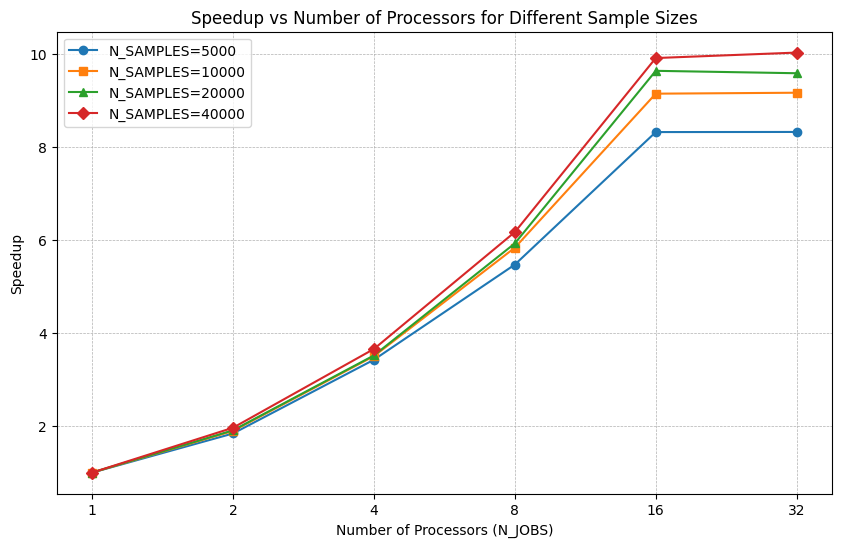

In [48]:
# plot speedup vs processors for different sample sizes
plt.figure(figsize=(10, 6))
markers = ['o', 's', '^', 'D']
for i, n_samples in enumerate(sorted(df_info["N_SAMPLES"].unique())):
    df_subset = df_info[df_info["N_SAMPLES"] == n_samples]
    t1 = df_subset[df_subset["N_JOBS"] == 1]["RUN_TIME"].values[0]
    speedup = t1 / df_subset["RUN_TIME"]
    plt.plot(df_subset["N_JOBS"], speedup, marker=markers[i % len(markers)], label=f"N_SAMPLES={n_samples}")
plt.xscale("log", base=2)
plt.xticks(df_info["N_JOBS"].unique(), df_info["N_JOBS"].unique())
plt.xlabel("Number of Processors (N_JOBS)")
plt.ylabel("Speedup")
plt.title("Speedup vs Number of Processors for Different Sample Sizes")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
# plt.savefig("speedup_vs_processors.png")
plt.show()

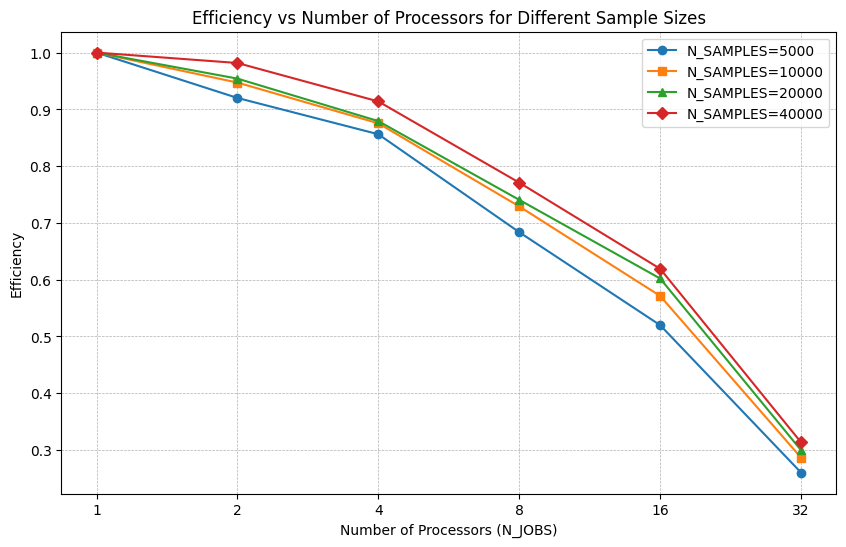

In [49]:
# plot efficiency vs processors for different sample sizes
plt.figure(figsize=(10, 6))
markers = ['o', 's', '^', 'D']
for i, n_samples in enumerate(sorted(df_info["N_SAMPLES"].unique())):
    df_subset = df_info[df_info["N_SAMPLES"] == n_samples]
    t1 = df_subset[df_subset["N_JOBS"] == 1]["RUN_TIME"].values[0]
    speedup = t1 / df_subset["RUN_TIME"]
    efficiency = speedup / df_subset["N_JOBS"]
    plt.plot(df_subset["N_JOBS"], efficiency, marker=markers[i % len(markers)], label=f"N_SAMPLES={n_samples}")
plt.xscale("log", base=2)
plt.xticks(df_info["N_JOBS"].unique(), df_info["N_JOBS"].unique())
plt.xlabel("Number of Processors (N_JOBS)")
plt.ylabel("Efficiency")
plt.title("Efficiency vs Number of Processors for Different Sample Sizes")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
# plt.savefig("efficiency_vs_processors.png")
plt.show()